In [3]:
# Libraries
from nilearn import datasets
import pandas as pd
from nilearn import plotting
import nibabel as nib
import nilearn
from PIL import Image
import matplotlib.pyplot as plt
import tqdm
import os
import numpy as np

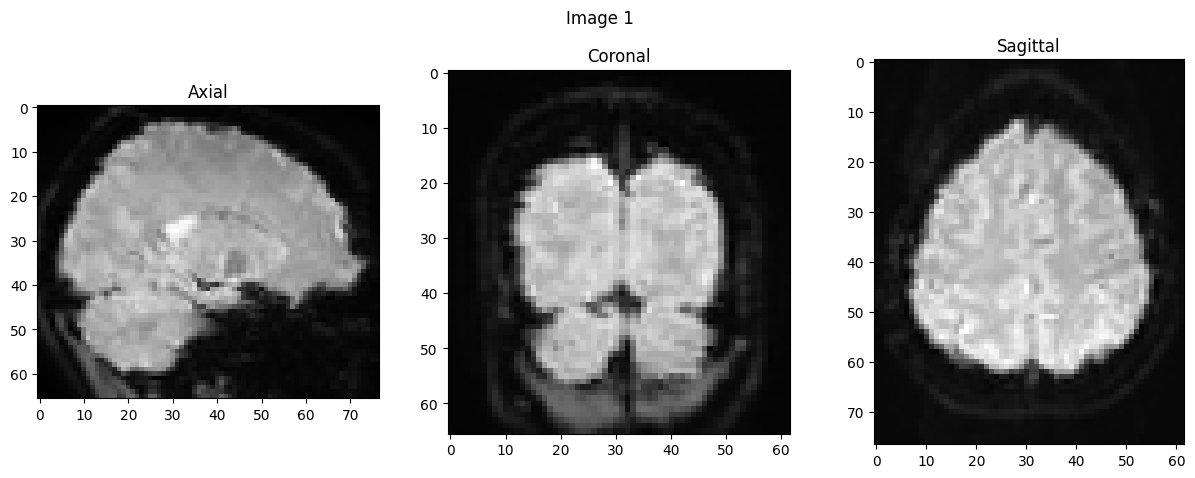

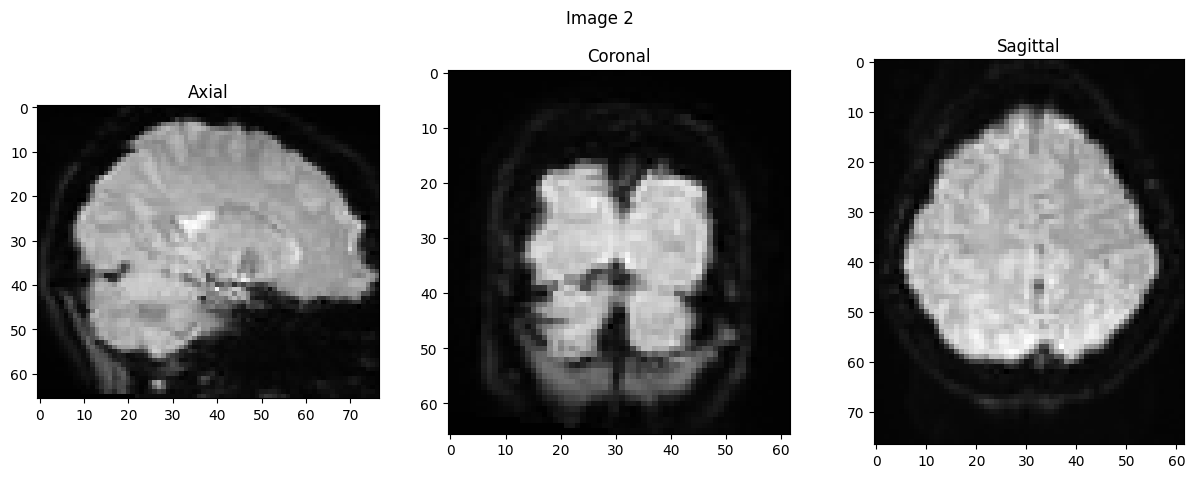

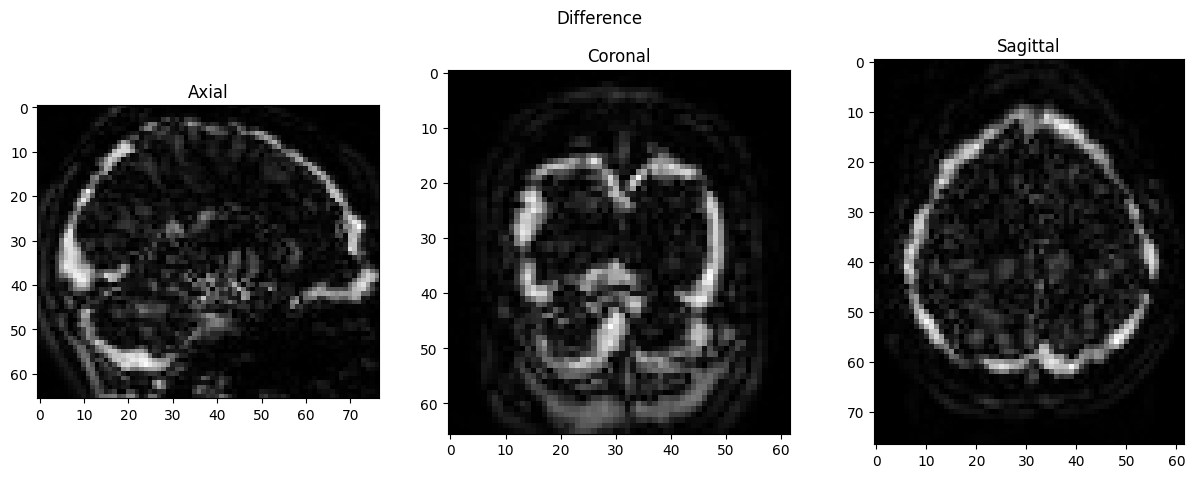

In [18]:
fimage1=nib.load('/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021007/ses-1/func/sub-126BPCP021007_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz').get_fdata()[...,210]
fimage2=nib.load('/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_10/sub-126BPCP021007/ses-1/func/sub-126BPCP021007_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz').get_fdata()[...,210]
difference = np.abs(fimage1 - fimage2)

# Function to plot slices
def plot_slices(image, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(title)
    axes[0].imshow(np.rot90(image[23, :, :]), cmap='gray')
    axes[0].set_title('Axial')
    axes[1].imshow(np.rot90(image[:, -64, :]), cmap='gray')
    axes[1].set_title('Coronal')
    axes[2].imshow(np.rot90(image[:, :, -15]), cmap='gray')
    axes[2].set_title('Sagittal')
    plt.show()

# Plot the original images and their difference
plot_slices(fimage1, 'Image 1')
plot_slices(fimage2, 'Image 2')
plot_slices(difference, 'Difference')

# fimage1=nib.load('/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021007/ses-1/func/sub-126BPCP021007_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
# image1=fimage1.get_fdata()[...,210]
# img_timepoint_nifti1 = nib.Nifti1Image(image1, affine=fimage1.affine)
# img1 = nilearn.plotting.plot_anat(img_timepoint_nifti1, cut_coords=(23,-64,-15),draw_cross=False)
# fimage2=nib.load('/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_10/sub-126BPCP021007/ses-1/func/sub-126BPCP021007_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
# image2=fimage2.get_fdata()[:,:, :, 210] 
# img_timepoint_nifti2 = nib.Nifti1Image(image2, affine=fimage2.affine)

# img2 = nilearn.plotting.plot_anat(img_timepoint_nifti2, cut_coords=(23,-64,-15),draw_cross=False)

# # Compute the absolute difference
# difference = np.abs(img1 - img2)
# # Function to plot slices
# def plot_slices(image, title):
#     fig, axes = plt.subplots(1, 3)
#     fig.suptitle(title)
#     axes[0].imshow(image[image.shape[0]//2, :, :], cmap='gray')
#     axes[0].set_title('Axial')
#     axes[1].imshow(image[:, image.shape[1]//2, :], cmap='gray')
#     axes[1].set_title('Coronal')
#     axes[2].imshow(image[:, :, image.shape[2]//2], cmap='gray')
#     axes[2].set_title('Sagittal')
#     plt.show()

# # Plot the original images and their difference
# plot_slices(img1, 'Image 1')
# plot_slices(img2, 'Image 2')
# plot_slices(difference, 'Difference')


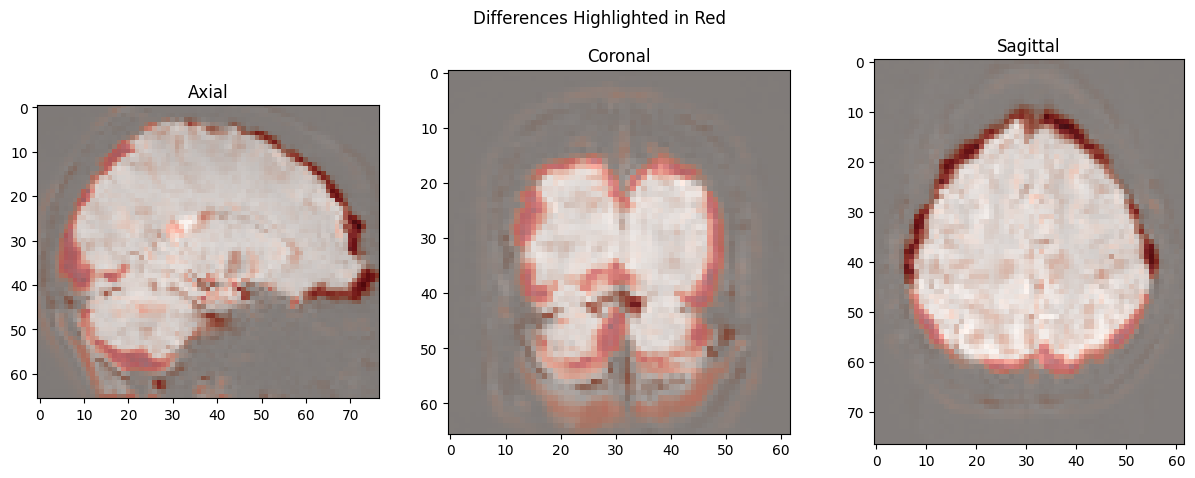

In [21]:

# Function to plot slices with differences in red
def plot_slices_with_differences(image1, image2, difference, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(title)
    # Plot image1 as background
    axes[0].imshow(np.rot90(image1[23, :, :]), cmap='gray')
    # Overlay differences in red
    axes[0].imshow(np.rot90(difference[23, :, :]), cmap='Reds', alpha=0.5)
    axes[0].set_title('Axial')
    
    axes[1].imshow(np.rot90(image1[:,-64, :]), cmap='gray')
    axes[1].imshow(np.rot90(difference[:,-64, :]), cmap='Reds', alpha=0.5)
    axes[1].set_title('Coronal')
    
    axes[2].imshow(np.rot90(image1[:, :, -15]), cmap='gray')
    axes[2].imshow(np.rot90(difference[:, :, -15]), cmap='Reds', alpha=0.5)
    axes[2].set_title('Sagittal')
    
    plt.show()

# Plot the original images and their differences
plot_slices_with_differences(fimage1, fimage2, difference, 'Differences Highlighted in Red')

In [ ]:
#nbias

base = '/home/mina94/scratch/fixSeed_threads/workdir_mca'
save_filepath='n4bias_input'
sub='sub_126BPCP021010'
for i in tqdm.tqdm(range(1,11)):
            try:
                img = nib.load(f'{base}/workdir_{i}/fmriprep_23_2_wf/{sub}_wf/bold_ses_1_task_rest_wf/bold_fit_wf/hmc_boldref_wf/gen_avg/{sub.replace("_","-")}_ses-1_task-rest_bold_average.nii.gz')
                # Plot MRI image without coordinate axes
                title = f'iter_{i}'
                plot = nilearn.plotting.plot_anat(img, title=title, cut_coords=(23,-64,-15),draw_cross=False)

                # Save the plot
                plot.savefig((f'{save_filepath}/{sub}/{i}_views.png'))
                plot.close()
            except Exception as e:
                print(e)
                continue
frames = [Image.open(f'{save_filepath}/{sub}/{image}') for image in os.listdir(f'{save_filepath}/{sub}')]
frame_one = frames[0]

frame_one.save(f"{save_filepath}/{sub}.gif", format="GIF", append_images=frames,save_all=True, duration=250, loop=0)


   

In [ ]:
#nbias

base = '/home/mina94/scratch/fixSeed_threads/workdir_mca'
save_filepath='n4bias_input'
for sub in range (1,11):

    if sub < 10:
            sub = f'sub_126BPCP02100{sub}'
    else:
            sub = 'sub_126BPCP021010'
    # Skip processing for subject sub-126BPCP021007

    for i in tqdm.tqdm(range(1,11)):
           
            try:
                img = nib.load(f'{base}/workdir_{i}/fmriprep_23_2_wf/{sub}_wf/bold_ses_1_task_rest_wf/bold_fit_wf/hmc_boldref_wf/gen_avg/{sub.replace("_","-")}_ses-1_task-rest_bold_average.nii.gz')
                # Plot MRI image without coordinate axes
                title = f'iter_{i}'
                plot = nilearn.plotting.plot_anat(img, title=title, cut_coords=(23,-64,-15),draw_cross=False)

                # Save the plot
                plot.savefig((f'{save_filepath}/{sub}/{i}_views.png'))
                plot.close()
            except Exception as e:
                print(e)
                continue
    frames = [Image.open(f'{save_filepath}/{sub}/{image}') for image in os.listdir(f'{save_filepath}/{sub}')]
    frame_one = frames[0]

    frame_one.save(f"{save_filepath}/{sub}.gif", format="GIF", append_images=frames,save_all=True, duration=250, loop=0)



